In [10]:
import numpy as np

path = "/home/andrea/Desktop/Final/Baseline5Prime/5.2/MW/"
filesK6 = []

for rep in range(1, 4):
    for mw in [4,5]:
        filesK6.append(path+'rep'+str(rep)+'/MW'+str(mw)+'/output_C2_T1_W64_K6_R'+str(rep)+'/times.log')

In [11]:
percentages = [[[],[]], [[],[]], [[],[]]]
for rep in range(1, 4):
    fileToOpen = []
    file4 = open([z for z in filesK6 if z == path+'rep'+str(rep)+'/MW4/output_C2_T1_W64_K6_R'+str(rep)+'/times.log'][0])
    file5 = open([z for z in filesK6 if z == path+'rep'+str(rep)+'/MW5/output_C2_T1_W64_K6_R'+str(rep)+'/times.log'][0])

    lines4 = []
    for line4 in file4:
        lines4.append(line4)

    x4 = np.asarray(lines4[1:])
    
    lines5 = []
    for line5 in file5:
        lines5.append(line5)

    x5 = np.asarray(lines5[1:])

    xMW4 = []
    for i in range(0, len(x4)):
        if x4[i] != "null\n":
            if x4[i].split("\t")[1] != '0':
                xMW4.append(float(x4[i].split("\t")[-1][:-1])/1000000)
            
    xMW5 = []
    for i in range(0, len(x5)):
        if x5[i] != "null\n":
            if x5[i].split("\t")[1] != '0':
                xMW5.append(float(x5[i].split("\t")[-1][:-1])/1000000)

    xMW4.sort()
    xMW5.sort()
    step = 0.25


    i = 0
    l = 1
    while step*l < xMW4[-1] and  len(percentages[rep-1][0]) < 70 :
        while xMW4[i] < (step*l):
            i += 1
        if i != 0:
            percentages[rep-1][0].append(((step*l - xMW4[i-1])/(xMW4[i] - xMW4[i-1]))*(i / len(xMW4)) - ((step*l - xMW4[i])/(xMW4[i] - xMW4[i-1]))*((i-1)/ len(xMW4)))   
        else:
            percentages[rep-1][0].append(0)
        l += 1
    
    i = 0
    l = 1
    while step*l < xMW5[-1] and len(percentages[rep-1][1]) < 70 :
        while xMW5[i] < (step*l):
            i += 1
        if i != 0:
            percentages[rep-1][1].append(((step*l - xMW5[i-1])/(xMW5[i] - xMW5[i-1]))*(i / len(xMW5)) - ((step*l - xMW5[i])/(xMW5[i] - xMW5[i-1]))*((i-1)/ len(xMW5)))   
        else:
            percentages[rep-1][1].append(0)
        l += 1

In [12]:
valori = [[],[],[]]
for rep in range(0, 3):
    for k in range(0, len(percentages[0][0])):
        valori[rep].append(np.mean([percentages[rep][0][k], percentages[rep][1][k]]))

In [13]:
values = []
errValues = []
for j in range(0,len(valori[0])):
    values.append(np.mean([valori[0][j], valori[1][j], valori[2][j]]))
    errValues.append(np.std([valori[0][j], valori[1][j], valori[2][j]]))

i = len(values)-1
while i > 0:
    values[i] = (values[i] - values[i-1])
    i -= 1

for i in range(0, len(values)):
    values[i] = values[i]*100
    errValues[i] = errValues[i]*100

In [14]:
responses = np.zeros(len(valori[0]))
i = step
idx = 0
while i <  len(valori[0])*step:
    responses[idx] = i

    i += step
    idx += 1


In [15]:
fileOutput = open(path+"histogramDataMW.txt", "w")

In [16]:
fileOutput.write("Histogram Data\n\nTime\tPercentage\n\n")
for i in range(0, len(responses)):
    fileOutput.write(str(responses[i])+"\t"+str(values[i])+"\n")
fileOutput.close()

In [29]:
import matplotlib.pyplot as plt

In [32]:
plt.figure(figsize=(27, 20))
width = step*2/3

plt.title('Response Time Distribution measured on middleware with Sharding', fontsize= 40)
plt.xlabel("Response Time [msec]", fontsize= 35)
plt.yticks(fontsize=14)
plt.ylabel("Percentage", fontsize= 35)
rect = plt.bar(responses, values, width, yerr=errValues, ecolor='blue', color='lightblue', capsize=5)
plt.legend(loc=2, fontsize='xx-large')
plt.xticks(np.arange(0,18.5,1), fontsize = 22)
plt.yticks(fontsize = 25)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%.2f' % float(height), ha='center', va='bottom', fontsize=16)

#autolabel(rect)


In [33]:
plt.savefig("/home/andrea/Desktop/Final/Baseline5Prime/rtDistributionMWShared.png")

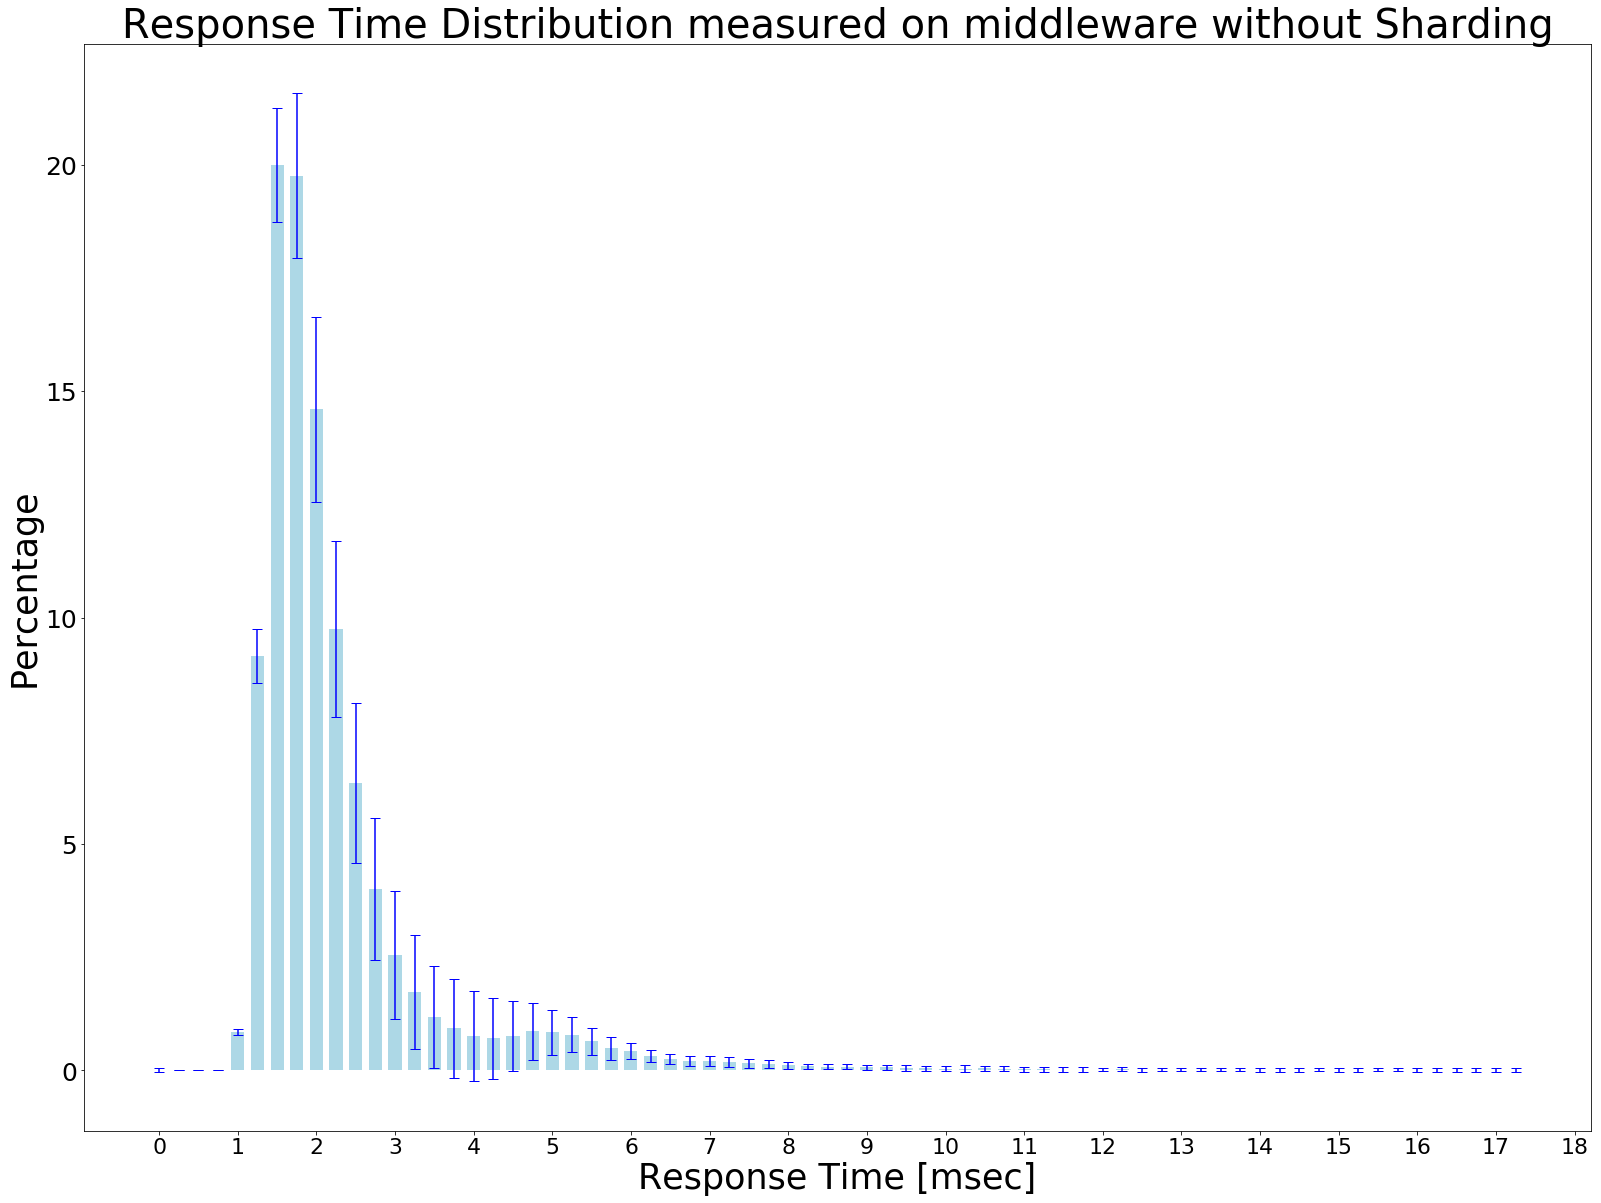

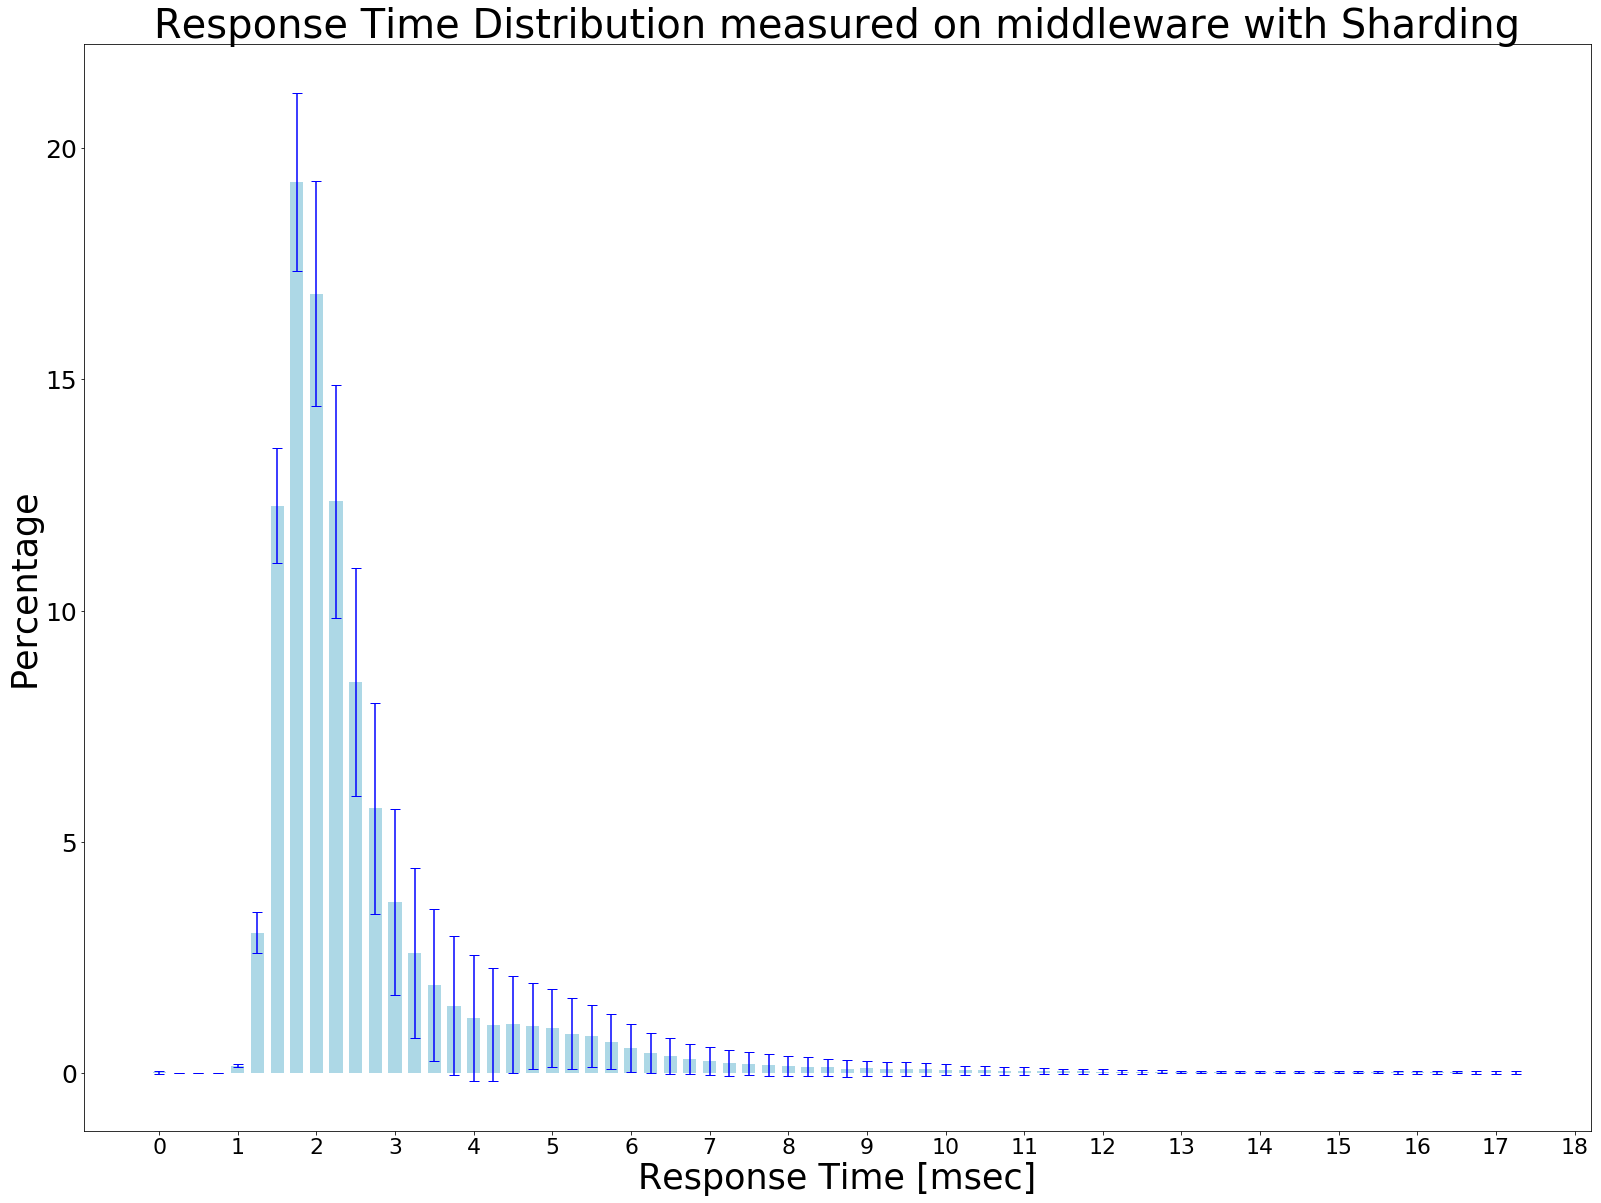

In [31]:
plt.show()